<a href="https://colab.research.google.com/github/O-Kpy/Dacon/blob/main/Dacon_%EC%A3%BC%EC%B0%A8%EC%88%98%EC%9A%94_%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import skew
from tqdm import tqdm

In [ ]:
!apt-get update -qq  ## 나눔 설치
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
import matplotlib as mpl
import matplotlib.font_manager as fm   ## 폰트 매니저
fontpath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' 
font = fm.FontProperties(fname=fontpath, size=9).get_name()
plt.rc('font', family=font) 
mpl.font_manager._rebuild()

In [24]:
train = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/대회/235745_parking_data/235745_parking_data_train.csv')
test = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/대회/235745_parking_data/235745_parking_data_test.csv')
submit = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/대회/235745_parking_data/235745_parking_data_sample_submission.csv')
info = pd.read_csv('/content/drive/MyDrive/dataset/Dacon/대회/235745_parking_data/235745_parking_data_age_gender_info.csv')
train.shape, test.shape, info.shape

((2952, 15), (1022, 14), (16, 23))

In [ ]:
train

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2947,C2532,239,아파트,강원도,국민임대,49.20,19,7.0,A,11346000,116090,0.0,1.0,166.0,146.0
2948,C2532,239,아파트,강원도,국민임대,51.08,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2949,C2532,239,아파트,강원도,국민임대,51.73,34,7.0,A,14005000,142310,0.0,1.0,166.0,146.0
2950,C2532,239,아파트,강원도,국민임대,51.96,114,7.0,A,14005000,142310,0.0,1.0,166.0,146.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2952 entries, 0 to 2951
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   단지코드                          2952 non-null   object 
 1   총세대수                          2952 non-null   int64  
 2   임대건물구분                        2952 non-null   object 
 3   지역                            2952 non-null   object 
 4   공급유형                          2952 non-null   object 
 5   전용면적                          2952 non-null   float64
 6   전용면적별세대수                      2952 non-null   int64  
 7   공가수                           2952 non-null   float64
 8   자격유형                          2952 non-null   object 
 9   임대보증금                         2383 non-null   object 
 10  임대료                           2383 non-null   object 
 11  도보 10분거리 내 지하철역 수(환승노선 수 반영)  2741 non-null   float64
 12  도보 10분거리 내 버스정류장 수            2948 non-null   float64
 13  단지내

In [ ]:
train.head()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
0,C2483,900,아파트,경상북도,국민임대,39.72,134,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
1,C2483,900,아파트,경상북도,국민임대,39.72,15,38.0,A,15667000,103680,0.0,3.0,1425.0,1015.0
2,C2483,900,아파트,경상북도,국민임대,51.93,385,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
3,C2483,900,아파트,경상북도,국민임대,51.93,15,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0
4,C2483,900,아파트,경상북도,국민임대,51.93,41,38.0,A,27304000,184330,0.0,3.0,1425.0,1015.0


In [25]:
# train set과 test set 합쳐서 전처리
data = pd.concat([train, test], axis=0)

In [ ]:
# null값 체크
pd.DataFrame(data.isnull().mean()).rename(columns={0:'percent'}).sort_values('percent', ascending=False)*100

,percent
등록차량수,25.717162
임대보증금,18.847509
임대료,18.847509
도보 10분거리 내 지하철역 수(환승노선 수 반영),6.366381
도보 10분거리 내 버스정류장 수,0.100654
자격유형,0.050327
단지코드,0.000000
총세대수,0.000000
임대건물구분,0.000000
지역,0.000000


In [ ]:
# null값 처리
data.loc[data['임대보증금'].isnull()]['자격유형'].unique()
# 임대보증금 null값들의 자격유형은 다 'D'이네...

array(['D'], dtype=object)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


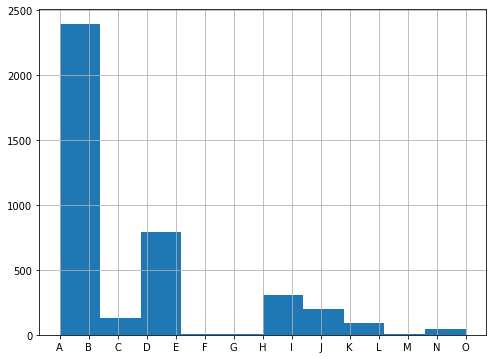

In [ ]:
# 자격유형에 대해서 EDA해보자
data['자격유형'].hist(figsize=(8,6))
# A가 가장 많고, dehijcdklno순

In [ ]:
data.loc[data['임대보증금'].isnull()]['지역'].unique()
# 서울 빼고 모든 지방이 포함되네

array(['강원도', '충청남도', '경상남도', '대전광역시', '부산광역시', '제주특별자치도', '울산광역시'],
      dtype=object)

In [ ]:
data.loc[data['임대보증금']=='-']
# 이것을 어떻게 처리할지 고민...

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2547,C1326,1934,아파트,부산광역시,국민임대,24.72,472,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2548,C1326,1934,아파트,부산광역시,국민임대,24.79,104,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2549,C1326,1934,아파트,부산광역시,국민임대,26.83,590,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2550,C1326,1934,아파트,부산광역시,국민임대,37.70,464,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2551,C1326,1934,아파트,부산광역시,국민임대,46.94,304,43.0,H,-,-,0.0,4.0,1670.0,1153.0
2680,C1786,480,아파트,강원도,행복주택,16.91,156,25.0,K,-,-,0.0,3.0,338.0,345.0
2681,C1786,480,아파트,강원도,행복주택,26.90,136,25.0,K,-,-,0.0,3.0,338.0,345.0
2682,C1786,480,아파트,강원도,행복주택,26.90,72,25.0,K,-,-,0.0,3.0,338.0,345.0
2683,C1786,480,아파트,강원도,행복주택,26.90,24,25.0,K,-,-,0.0,3.0,338.0,345.0
2906,C2186,924,아파트,대구광역시,국민임대,29.17,238,0.0,H,-,-,0.0,8.0,664.0,744.0


In [ ]:
data.loc[data['자격유형'] == 'D']
# 전용면적별세대수를 보면 D유형은 다 1세대 이다.
# 분양해서 들어온것으로 추측할 수 있다.(0으로 치환)

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
88,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
89,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
90,C1925,601,상가,강원도,임대상가,32.10,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
91,C1925,601,상가,강원도,임대상가,72.16,1,9.0,D,NaN,NaN,0.0,4.0,117.0,75.0
101,C1874,619,상가,충청남도,임대상가,12.62,1,2.0,D,NaN,NaN,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,C1729,627,상가,강원도,임대상가,32.46,1,0.0,D,NaN,NaN,0.0,5.0,131.0,NaN
329,C1729,627,상가,강원도,임대상가,34.86,1,0.0,D,NaN,NaN,0.0,5.0,131.0,NaN
330,C1729,627,상가,강원도,임대상가,35.76,1,0.0,D,NaN,NaN,0.0,5.0,131.0,NaN
331,C1729,627,상가,강원도,임대상가,50.08,1,0.0,D,NaN,NaN,0.0,5.0,131.0,NaN


In [26]:
data['임대보증금'] = data['임대보증금'].fillna(0)
data['임대료'] = data['임대료'].fillna(0)
data['임대보증금'] = data['임대보증금'].replace({'-':0})
data['임대료'] = data['임대료'].replace({'-':0})

In [27]:
data['임대보증금'] = data['임대보증금'].astype('int')
data['임대료'] = data['임대료'].astype('int')

In [ ]:
data.loc[data['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull()]
# 지하철 null값을 처리하기 위해 지역을 EDA해보자

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
94,C1312,518,아파트,충청남도,국민임대,39.72,60,12.0,A,17460000,122210,NaN,3.0,527.0,359.0
95,C1312,518,아파트,충청남도,국민임대,39.98,89,12.0,A,17460000,122210,NaN,3.0,527.0,359.0
96,C1312,518,아파트,충청남도,국민임대,41.55,225,12.0,A,19954000,130940,NaN,3.0,527.0,359.0
97,C1312,518,아파트,충청남도,국민임대,46.90,143,12.0,A,28687000,149660,NaN,3.0,527.0,359.0
98,C1874,619,아파트,충청남도,영구임대,26.37,294,2.0,C,3141000,69900,NaN,2.0,97.0,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,C1318,312,아파트,충청남도,공공임대(50년),49.99,159,1.0,A,18269000,258880,NaN,11.0,226.0,NaN
891,C1327,98,아파트,대전광역시,행복주택,16.83,30,13.0,J,18800000,94000,NaN,17.0,98.0,NaN
892,C1327,98,아파트,대전광역시,행복주택,26.51,10,13.0,J,28400000,142000,NaN,17.0,98.0,NaN
893,C1327,98,아파트,대전광역시,행복주택,26.51,10,13.0,J,28400000,142000,NaN,17.0,98.0,NaN


In [ ]:
data.loc[data['지역']=='충청남도']['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].unique()
# 충남의 지하철역 수는 0이다. ==> 충남 지하철=0으로 처리

array([nan,  0.])

In [ ]:
data.loc[data['지역']=='대전광역시']['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].unique()
# 대전광역시는 지하철이 있으니 단지코드별 비교를 통해 null값 처리

array([ 1.,  0., nan,  2.])

In [ ]:
data.loc[data['지역']=='경상남도']['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].unique()
# 경상남도도 지하철이 있다고 하니 단지코드별 비교를 통해 처리

array([ 0., nan,  1.])

In [ ]:
data.groupby(['지역','단지코드'])['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].value_counts(dropna=False).loc['경상남도'].sort_index()
# 단지마다 지하철역 수가 결측치가 관측된다. ==> 단지별 비교는 안될 것 같다.

단지코드   도보 10분거리 내 지하철역 수(환승노선 수 반영)
C1003  0.0                              8
C1027  0.0                              5
C1077  0.0                              3
C1141  0.0                              6
C1147  0.0                              7
                                       ..
C2571  0.0                             14
C2576  0.0                              2
C2595  0.0                              5
C2631  0.0                              7
C2680  0.0                              3
Name: 도보 10분거리 내 지하철역 수(환승노선 수 반영), Length: 69, dtype: int64

In [28]:
data.loc[(data['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].isnull())&(data['지역']=='충청남도'), '도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = 0.
data['도보 10분거리 내 지하철역 수(환승노선 수 반영)'] = data['도보 10분거리 내 지하철역 수(환승노선 수 반영)'].fillna(0.)

In [ ]:
# 도보 10분거리 내 버스정류장 수 null값 처리
data.loc[data['단지코드']=='C1649']
# 단지코드 'C1649'는 아예 정류장 수가 결측되었다. ==> 경상남도의 median으로 처리하자

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
2315,C1649,575,아파트,경상남도,공공임대(10년),74.97,80,15.0,A,46000000,456000,0.0,NaN,1066.0,855.0
2316,C1649,575,아파트,경상남도,공공임대(10년),84.95,124,15.0,A,57000000,462000,0.0,NaN,1066.0,855.0
2317,C1649,575,아파트,경상남도,공공임대(10년),84.96,289,15.0,A,57000000,462000,0.0,NaN,1066.0,855.0
2318,C1649,575,아파트,경상남도,공공임대(10년),84.98,82,15.0,A,57000000,462000,0.0,NaN,1066.0,855.0


In [29]:
data.loc[data['도보 10분거리 내 버스정류장 수'].isnull(), '도보 10분거리 내 버스정류장 수'] = 0.

In [12]:
# 자격유형 null값 처리
data.loc[data['자격유형'].isnull()]
# 자격유형을 임대보증금과 비교하여 처리

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
196,C2411,962,아파트,경상남도,국민임대,46.90,240,25.0,NaN,71950000,37470,0.0,2.0,840.0,NaN
258,C2253,1161,아파트,강원도,영구임대,26.37,745,0.0,NaN,2249000,44770,0.0,2.0,173.0,NaN


In [30]:
data.loc[(data['자격유형'].isnull())&(data['지역']=='경상남도'), '자격유형'] = 'E'
data.loc[(data['자격유형'].isnull())&(data['지역']=='강원도'), '자격유형'] = 'C'

In [31]:
# 이상값 처리
Q1 = data['도보 10분거리 내 버스정류장 수'].quantile(0.25)
Q3 = data['도보 10분거리 내 버스정류장 수'].quantile(0.75)
IQR = Q3-Q1
data.loc[(data['도보 10분거리 내 버스정류장 수']<Q1-1.5*IQR)|(data['도보 10분거리 내 버스정류장 수']>Q3+1.5*IQR)]

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
42,C1244,1722,아파트,경기도,국민임대,39.62,275,10.0,A,29551000,203030,0.0,10.0,1483.0,1804.0
43,C1244,1722,아파트,경기도,국민임대,39.62,126,10.0,A,29551000,203030,0.0,10.0,1483.0,1804.0
44,C1244,1722,아파트,경기도,국민임대,39.62,168,10.0,A,29551000,203030,0.0,10.0,1483.0,1804.0
45,C1244,1722,아파트,경기도,국민임대,39.72,219,10.0,A,29551000,203030,0.0,10.0,1483.0,1804.0
46,C1244,1722,아파트,경기도,국민임대,46.73,98,10.0,A,43990000,304540,0.0,10.0,1483.0,1804.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,C1683,328,아파트,경기도,행복주택,21.54,16,14.0,J,14498000,62940,0.0,11.0,250.0,NaN
986,C1683,328,아파트,경기도,행복주택,26.41,56,14.0,J,17434000,75690,0.0,11.0,250.0,NaN
987,C1683,328,아파트,경기도,행복주택,26.41,4,14.0,J,17434000,75690,0.0,11.0,250.0,NaN
988,C1683,328,아파트,경기도,행복주택,36.64,69,14.0,J,24186000,105010,0.0,11.0,250.0,NaN


In [32]:
# 이상값은 최소,대값으로 처리
data.loc[(data['도보 10분거리 내 버스정류장 수'] < Q1-5*IQR), '도보 10분거리 내 버스정류장 수'] = Q1-5*IQR
data.loc[(data['도보 10분거리 내 버스정류장 수'] > Q3+5*IQR), '도보 10분거리 내 버스정류장 수'] = Q3+5*IQR

In [ ]:
data.skew()
# 다 log변환을 해야한다. 그 전에 모델링 돌려보자

총세대수                             1.268751
전용면적                            10.864622
전용면적별세대수                         3.321005
공가수                              0.810131
임대보증금                            2.845083
임대료                              1.637468
도보 10분거리 내 지하철역 수(환승노선 수 반영)     2.868214
도보 10분거리 내 버스정류장 수               1.934480
단지내주차면수                          0.945232
등록차량수                            1.461736
dtype: float64

In [ ]:
# 상관계수를 보자
from sklearn.preprocessing import LabelEncoder
data_copy=data.copy()
for i in data_copy.select_dtypes('object'):
  data_copy[i] = LabelEncoder().fit_transform(data_copy[i])

data_copy.corr()

,단지코드,총세대수,임대건물구분,지역,공급유형,전용면적,전용면적별세대수,공가수,자격유형,임대보증금,임대료,도보 10분거리 내 지하철역 수(환승노선 수 반영),도보 10분거리 내 버스정류장 수,단지내주차면수,등록차량수
단지코드,1.000000,0.048983,-0.069088,-0.020800,0.019559,-0.004582,-0.030955,0.000845,0.051644,-0.071803,-0.029130,-0.120087,-0.081409,-0.080123,-0.099950
총세대수,0.048983,1.000000,-0.395954,-0.050277,0.112987,0.053513,0.090440,0.125877,0.105370,-0.143949,-0.153476,0.195048,-0.005914,0.469530,0.316703
임대건물구분,-0.069088,-0.395954,1.000000,-0.118590,-0.415907,-0.024147,0.369218,0.198148,-0.135264,0.483030,0.548481,-0.147159,0.046569,0.395826,0.449189
지역,-0.020800,-0.050277,-0.118590,1.000000,0.022463,-0.006460,-0.039802,-0.011008,-0.024636,-0.137169,-0.164484,-0.055085,-0.112403,-0.182264,-0.169999
공급유형,0.019559,0.112987,-0.415907,0.022463,1.000000,-0.217368,-0.203735,0.180054,0.651762,-0.290686,-0.692461,0.066679,-0.030108,-0.369375,-0.518342
전용면적,-0.004582,0.053513,-0.024147,-0.006460,-0.217368,1.000000,-0.027360,-0.070725,-0.169489,0.137201,0.199376,0.009669,-0.001577,0.069806,0.115453
전용면적별세대수,-0.030955,0.090440,0.369218,-0.039802,-0.203735,-0.027360,1.000000,0.155941,-0.089566,0.102118,0.172775,-0.041335,0.039301,0.294625,0.247085
공가수,0.000845,0.125877,0.198148,-0.011008,0.180054,-0.070725,0.155941,1.000000,0.239767,0.133226,-0.022510,-0.037642,0.038542,0.281112,0.118121
자격유형,0.051644,0.105370,-0.135264,-0.024636,0.651762,-0.169489,-0.089566,0.239767,1.000000,0.001296,-0.243282,-0.008183,-0.003009,-0.108682,-0.154491
임대보증금,-0.071803,-0.143949,0.483030,-0.137169,-0.290686,0.137201,0.102118,0.133226,0.001296,1.000000,0.598350,-0.051386,0.108394,0.390195,0.436073


In [74]:
train = data.loc[data['등록차량수'].notnull()]
test = data.loc[data['등록차량수'].isnull()].drop(columns='등록차량수')

In [75]:
train['전용면적'] = train['전용면적']//5*5
test['전용면적'] = test['전용면적']//5*5


idx = train[train['전용면적']>100].index
train.loc[idx, '전용면적'] = 100
idx = test[test['전용면적']>100].index
test.loc[idx, '전용면적'] = 100

idx = train[train['전용면적']<10].index
train.loc[idx, '전용면적'] = 10
idx = test[test['전용면적']<10].index
test.loc[idx, '전용면적'] = 10

In [76]:
columns = ['단지코드', '총세대수', '공가수', '지역', '단지내주차면수', '도보 10분거리 내 지하철역 수(환승노선 수 반영)', '도보 10분거리 내 버스정류장 수']
target = '등록차량수'
area_columns = []
for area in train['전용면적'].unique():
    area_columns.append(f'면적_{area}')

new_train = pd.DataFrame()
new_test = pd.DataFrame()

for i, code in tqdm(enumerate(train['단지코드'].unique())):
    temp = train[train['단지코드']==code]
    temp.index = range(temp.shape[0])
    for col in columns:
        new_train.loc[i, col] = temp.loc[0, col]

    
    for col in area_columns:
        area = float(col.split('_')[-1])
        new_train.loc[i, col] = temp[temp['전용면적']==area]['전용면적별세대수'].sum()
    

    
    new_train.loc[i, '등록차량수'] = temp.loc[0, '등록차량수']
    
for i, code in tqdm(enumerate(test['단지코드'].unique())):
    temp = test[test['단지코드']==code]
    temp.index = range(temp.shape[0])
    for col in columns:
        new_test.loc[i, col] = temp.loc[0, col]
    
    for col in area_columns:
        area = float(col.split('_')[-1])
        new_test.loc[i, col] = temp[temp['전용면적']==area]['전용면적별세대수'].sum()

423it [00:09, 43.00it/s]
150it [00:03, 41.19it/s]


In [77]:
# 임대보증금과 임대료 aggregation
data_agg = data.groupby('단지코드')['임대보증금'].agg(['median'])
data_agg_col = []

for i in data_agg.columns:
  data_agg_col.append(f'{i}-임대보증금')

data_agg.columns = data_agg_col
data_agg

,median-임대보증금
단지코드,
C1000,14404000
C1003,22600000
C1004,0
C1005,16348000
C1006,0
...,...
C2676,0
C2680,25293000
C2688,7897500


In [78]:
data_agg_b = data.groupby('단지코드')['임대료'].agg(['median'])
data_agg_col_b = []

for i in data_agg_b.columns:
  data_agg_col_b.append(f'{i}-임대료')

data_agg_b.columns = data_agg_col_b
data_agg_b

,median-임대료
단지코드,
C1000,129640
C1003,115500
C1004,0
C1005,210900
C1006,0
...,...
C2676,0
C2680,145410
C2688,86695


In [79]:
new_train = new_train.merge(data_agg, how='left', on='단지코드')
new_test = new_test.merge(data_agg, how='left', on='단지코드')
new_train = new_train.merge(data_agg_b, how='left', on='단지코드')
new_test = new_test.merge(data_agg_b, how='left', on='단지코드')

In [ ]:
new_train['실거주세대'] = new_train['총세대수'] - new_train['공가수']
new_test['실거주세대'] = new_test['총세대수'] - new_test['공가수']

In [80]:
new_train['단지내주차면수_bin']=pd.qcut(new_train['단지내주차면수'], 5, labels=['a','b','c','d','e'])
new_test['단지내주차면수_bin']=pd.qcut(new_test['단지내주차면수'], 5, labels=['a','b','c','d','e'])

In [81]:
new_train['공실율'] = new_train['공가수']/new_train['총세대수']*100
new_test['공실율'] = new_test['공가수']/new_test['총세대수']*100
new_train['세대당주차면수'] = new_train['단지내주차면수']/new_train['총세대수']
new_test['세대당주차면수'] = new_test['단지내주차면수']/new_test['총세대수']

In [ ]:
new_train = new_train.merge(data.groupby('단지코드')['공급유형'].value_counts().unstack().fillna(0), how='left', on='단지코드')
new_test = new_test.merge(data.groupby('단지코드')['공급유형'].value_counts().unstack().fillna(0), how='left', on='단지코드')

In [ ]:
new_train = new_train.merge(data.groupby(['단지코드'])['임대건물구분'].value_counts().unstack().fillna(0), how='left', on='단지코드')
new_test = new_test.merge(data.groupby(['단지코드'])['임대건물구분'].value_counts().unstack().fillna(0), how='left', on='단지코드')

In [ ]:
# info 병합하는 셀
new_train = new_train.merge(info, how='left', on='지역')
new_test = new_test.merge(info, how='left', on='지역')

In [82]:
new_train['mean-임대보증금'] = np.log1p(new_train['median-임대보증금'])
new_test['mean-임대보증금'] = np.log1p(new_test['median-임대보증금'])
new_train['mean-임대료'] = np.log1p(new_train['median-임대료'])
new_test['mean-임대료'] = np.log1p(new_test['median-임대료'])

# 다른 버전

In [ ]:
train_g = train.groupby('단지코드').mean()
test_g = test.groupby('단지코드').mean()

In [ ]:
train_g = train_g.reset_index()
test_g = test_g.reset_index()

In [ ]:
train_g['실거주세대'] = train_g['총세대수'] - train_g['공가수']
test_g['실거주세대'] = test_g['총세대수'] - test_g['공가수']

In [ ]:
train_g['단지내주차면수_bin']=pd.qcut(train_g['단지내주차면수'], 5, labels=['a','b','c','d','e'])
test_g['단지내주차면수_bin']=pd.qcut(test_g['단지내주차면수'], 5, labels=['a','b','c','d','e'])

In [ ]:
train_g['공실율'] = train_g['공가수']/train_g['총세대수']*100
test_g['공실율'] = test_g['공가수']/test_g['총세대수']*100
train_g['세대당주차면수'] = train_g['단지내주차면수']/train_g['총세대수']
test_g['세대당주차면수'] = test_g['단지내주차면수']/test_g['총세대수']

In [ ]:
train_g = train_g.merge(data.groupby('단지코드')['공급유형'].value_counts().unstack().fillna(0), how='left', on='단지코드')
test_g = test_g.merge(data.groupby('단지코드')['공급유형'].value_counts().unstack().fillna(0), how='left', on='단지코드')

In [ ]:
train_g = train_g.merge(data.groupby(['단지코드'])['임대건물구분'].value_counts().unstack().fillna(0), how='left', on='단지코드')
test_g = test_g.merge(data.groupby(['단지코드'])['임대건물구분'].value_counts().unstack().fillna(0), how='left', on='단지코드')

In [ ]:
train_g = pd.get_dummies(train_g, columns=['단지내주차면수_bin'])
test_g = pd.get_dummies(test_g, columns=['단지내주차면수_bin'])

In [ ]:
train_g = train_g.merge(train[['단지코드', '지역']], how='left', on='단지코드')
test_g = test_g.merge(test[['단지코드', '지역']], how='left', on='단지코드')

In [ ]:
train_g = train_g.drop_duplicates(subset='단지코드', keep='first')
test_g = test_g.drop_duplicates(subset='단지코드', keep='first')

In [ ]:
train_g = pd.get_dummies(data=train_g, columns=['지역'])
test_g = pd.get_dummies(data=test_g, columns=['지역'])
test_g['지역_서울특별시'] = 0

In [ ]:
x_train = train_g.drop(columns=['단지코드', '등록차량수'])
y_train = train_g['등록차량수']
x_test = test_g.drop(columns=['단지코드'])

In [ ]:
corr_matrix = train_g.corr()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

to_drop = [c for c in upper.columns if any(abs(upper[c]) > 0.9)]

print(f'There are {len(train_g.columns)} columns but {len(to_drop)} corr columns to remove')

There are 46 columns but 1 corr columns to remove


In [ ]:
to_drop

['상가']

In [ ]:
new_train = new_train.drop(columns=to_drop)
new_test = new_test.drop(columns=to_drop)

In [ ]:
new_train.isnull().sum()

단지코드        0
총세대수        0
공가수         0
지역          0
단지내주차면수     0
           ..
80대(남자)     0
90대(여자)     0
90대(남자)     0
100대(여자)    0
100대(남자)    0
Length: 64, dtype: int64

In [83]:
new_train = pd.get_dummies(new_train, columns=['단지내주차면수_bin'])
new_test = pd.get_dummies(new_test, columns=['단지내주차면수_bin'])

In [84]:
from sklearn.impute import SimpleImputer

for i in new_train.columns:
  if new_train[i].dtype == 'object':
    continue
  new_train[i] = new_train[i].fillna(new_train[i].median())

In [85]:
for i in new_test.columns:
  if new_test[i].dtype == 'object':
    continue
  new_test[i] = new_test[i].fillna(new_test[i].median())

In [86]:
x_train = new_train.drop(columns=['단지코드', '등록차량수'])
y_train = new_train['등록차량수']
x_test = new_test.drop(columns=['단지코드'])

In [47]:
from sklearn.preprocessing import robust_scale
x_train_col = x_train.columns

for i in x_train.columns:
  if x_train[i].dtype=='object':
    continue
  x_train[i] = robust_scale(x_train[i])

for i in x_test.columns:
  if x_test[i].dtype=='object':
    continue
  x_test[i] = robust_scale(x_test[i])

In [ ]:
# feature selection
x_train = new_train.drop(columns=['단지코드', '등록차량수', '면적_100.0', '면적_75.0', '면적_15.0', '면적_40.0', '면적_60.0', '면적_65.0'])
y_train = new_train['등록차량수']
x_test = new_test.drop(columns=['단지코드', '면적_100.0', '면적_75.0', '면적_15.0', '면적_40.0', '면적_60.0', '면적_65.0'])

In [49]:
pip install catboost

     |████████████████████████████████| 69.2MB 41kB/s 


In [50]:
import catboost
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import mean_absolute_error
import lightgbm
import xgboost

In [87]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
preds_test_cat = np.zeros((len(x_test)))
cat_features = []
MAE={}

for i in x_train.columns:
  if x_train[i].dtype=='float':
    continue
  elif x_train[i].dtype=='int':
    continue
  cat_features.append(i)

for i,(train_index, valid_index) in enumerate(kf.split(x_train, y_train)):
  X_train, X_valid = x_train.iloc[train_index], x_train.iloc[valid_index]
  Y_train, Y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

  model_cat = catboost.CatBoostRegressor(learning_rate=0.05, loss_function='MAE', eval_metric='MAE', n_estimators=3000, cat_features=cat_features, use_best_model=True)
  model_cat.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_valid, Y_valid)], verbose=100, early_stopping_rounds=50)

  preds_test_cat = model_cat.predict(x_test)
  preds_val = model_cat.predict(X_valid)
  MAE[i] = mean_absolute_error(preds_val, Y_valid)
  
MAE = pd.Series(MAE)
print(f'평균 MAE:{MAE.mean()}')

0:	learn: 282.6636831	test: 282.6636831	test1: 246.6976733	best: 246.6976733 (0)	total: 5.24ms	remaining: 15.7s
100:	learn: 81.9701576	test: 84.5298508	test1: 116.5816814	best: 115.4514291 (88)	total: 444ms	remaining: 12.7s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 115.4514291
bestIteration = 88

Shrink model to first 89 iterations.
0:	learn: 273.0449989	test: 273.0449989	test1: 339.4034872	best: 339.4034872 (0)	total: 12.1ms	remaining: 36.3s
100:	learn: 79.3769778	test: 82.1346890	test1: 189.3671169	best: 189.3671169 (100)	total: 459ms	remaining: 13.2s
200:	learn: 49.8286642	test: 54.6943828	test1: 180.2097264	best: 179.7461187 (195)	total: 908ms	remaining: 12.6s
300:	learn: 37.0558334	test: 43.1710095	test1: 177.2732492	best: 176.8396597 (294)	total: 1.36s	remaining: 12.2s
400:	learn: 30.5697977	test: 37.4473709	test1: 173.0044582	best: 173.0044582 (400)	total: 1.79s	remaining: 11.6s
500:	learn: 26.1338114	test: 33.5604429	test1: 170.5000339	best: 170.4718010 

Text(0.5, 1.0, 'preds vs y')

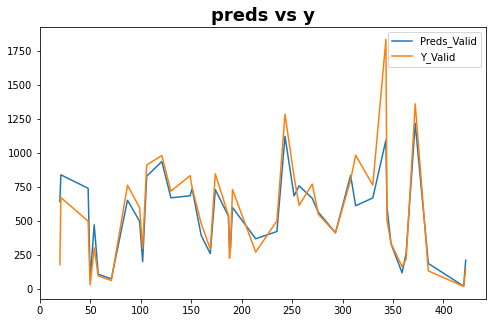

In [88]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(pd.Series(preds_val, index=Y_valid.index), label='Preds_Valid')
ax.plot(Y_valid, label='Y_Valid')
ax.legend()
ax.set_title('preds vs y', fontsize=18, fontweight='bold')

In [ ]:
pd.Series(model_cat.feature_importances_, index=x_train.columns).sort_values(ascending=False)

단지내주차면수          28.289024
단지내주차면수_bin_e     7.025055
총세대수              4.767807
공실율               3.605716
면적_45.0           3.518916
                   ...    
면적_75.0           0.000000
면적_65.0           0.000000
공공분양              0.000000
공공임대(5년)          0.000000
공공임대(분납)          0.000000
Length: 65, dtype: float64

In [89]:
# lgbm으로 모델링
local_map = {}
for i, loc in enumerate(new_train['지역'].unique()):
    local_map[loc] = i

new_train['지역'] = new_train['지역'].map(local_map)
new_test['지역'] = new_test['지역'].map(local_map)


x_train = new_train.drop(columns=['단지코드', '등록차량수'])
y_train = new_train['등록차량수']
x_test = new_test.drop(columns=['단지코드'])

In [ ]:
x_train.shape, x_test.shape

((423, 65), (150, 65))

In [90]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
preds_test_lgbm = np.zeros((len(x_test)))
param_lgbm = {'learning_rate':0.026, 'objective':'MAE'}
MAE={}
for i,(train_index, valid_index) in enumerate(kf.split(x_train, y_train)):
  X_train, X_valid = x_train.iloc[train_index], x_train.iloc[valid_index]
  Y_train, Y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

  model_lgbm = lightgbm.LGBMRegressor(n_estimators=3000, **param_lgbm)
  model_lgbm.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_valid, Y_valid)], verbose=100, early_stopping_rounds=70, eval_metric='MAE')

  preds_test_lgbm = model_lgbm.predict(x_test)
  preds_valid = model_lgbm.predict(X_valid)
  MAE[i] = mean_absolute_error(preds_valid, Y_valid)
  
MAE = pd.Series(MAE)
print(f'평균 MAE:{MAE.mean()}')

Training until validation scores don't improve for 70 rounds.
[100]	training's l1: 98.4712	valid_1's l1: 127.72
[200]	training's l1: 79.6668	valid_1's l1: 124.418
Early stopping, best iteration is:
[182]	training's l1: 81.5711	valid_1's l1: 123.444
Training until validation scores don't improve for 70 rounds.
[100]	training's l1: 95.2533	valid_1's l1: 204.193
[200]	training's l1: 76.0461	valid_1's l1: 185.816
[300]	training's l1: 70.026	valid_1's l1: 184.747
[400]	training's l1: 66.4488	valid_1's l1: 183.997
[500]	training's l1: 63.8559	valid_1's l1: 183.588
[600]	training's l1: 62.3	valid_1's l1: 183.172
[700]	training's l1: 61.0125	valid_1's l1: 182.948
[800]	training's l1: 59.8414	valid_1's l1: 182.855
Early stopping, best iteration is:
[761]	training's l1: 60.2374	valid_1's l1: 182.747
Training until validation scores don't improve for 70 rounds.
[100]	training's l1: 103.812	valid_1's l1: 115.186
[200]	training's l1: 83.1195	valid_1's l1: 97.6686
[300]	training's l1: 76.3677	valid_

In [58]:
lgbm_importance = pd.Series(model_lgbm.feature_importances_, index=x_train.columns).sort_values(ascending=False)
feature_selection_lgbm = lgbm_importance.loc[lgbm_importance<1].T
lgbm_importance

단지내주차면수                         1108
세대당주차면수                         1060
총세대수                            1014
median-임대료                       999
median-임대보증금                     919
면적_35.0                          868
공실율                              844
면적_45.0                          815
공가수                              554
면적_50.0                          549
지역                               547
도보 10분거리 내 버스정류장 수               386
면적_25.0                          173
도보 10분거리 내 지하철역 수(환승노선 수 반영)     160
면적_55.0                          139
면적_30.0                          124
면적_40.0                           45
면적_15.0                           40
단지내주차면수_bin_b                     32
면적_20.0                           26
단지내주차면수_bin_c                     26
단지내주차면수_bin_d                     23
단지내주차면수_bin_a                     10
면적_80.0                            5
면적_70.0                            2
면적_100.0                           1
면적_10.0                            0
면

Text(0.5, 1.0, 'preds vs y')

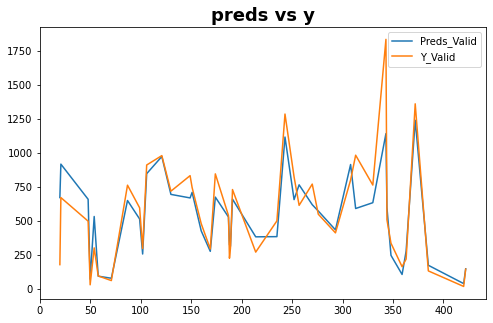

In [91]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(pd.Series(preds_valid, index=Y_valid.index), label='Preds_Valid')
ax.plot(Y_valid, label='Y_Valid')
ax.legend()
ax.set_title('preds vs y', fontsize=18, fontweight='bold')

In [61]:
from sklearn.ensemble import RandomForestRegressor

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
preds_test_lgbm = np.zeros((len(x_test)))
param_Ran = {'criterion':'mae', 'random_state':42}
MAE={}
for i,(train_index, valid_index) in enumerate(kf.split(x_train, y_train)):
  X_train, X_valid = x_train.iloc[train_index], x_train.iloc[valid_index]
  Y_train, Y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

  model_Ran = RandomForestRegressor(n_estimators=1000, **param_Ran, n_jobs=-1)
  model_Ran.fit(X_train, Y_train)

  preds_test_Ran = model_Ran.predict(x_test)
  preds_valid = model_Ran.predict(X_valid)
  MAE[i] = mean_absolute_error(preds_valid, Y_valid)
  
MAE = pd.Series(MAE)
print(f'평균 MAE:{MAE.mean()}')

평균 MAE:129.28147084717608


In [ ]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
preds_test_xgb = np.zeros((len(x_test)))
param_xgb = {'learning_rate':0.026}

for i,(train_index, valid_index) in enumerate(skf.split(x_train, y_train)):
  X_train, X_valid = x_train.iloc[train_index], x_train.iloc[valid_index]
  Y_train, Y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

  model_xgb = xgboost.XGBRegressor(n_estimators=3000, **param_xgb)
  model_xgb.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_valid, Y_valid)], verbose=100, early_stopping_rounds=70, eval_metric='mae')

  preds_test_xgb = model_xgb.predict(x_test)
  preds_valid = model_xgb.predict(X_valid)

[08:01:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-mae:537.229	validation_1-mae:637.198
Multiple eval metrics have been passed: 'validation_1-mae' will be used for early stopping.

Will train until validation_1-mae hasn't improved in 70 rounds.
[100]	validation_0-mae:97.0002	validation_1-mae:163.949
[200]	validation_0-mae:72.0204	validation_1-mae:162.185
Stopping. Best iteration:
[185]	validation_0-mae:73.7952	validation_1-mae:161.463



ValueError: ignored

In [92]:
from sklearn.linear_model import ElasticNet

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
preds_test_Ela = np.zeros((len(x_test)))

for i,(train_index, valid_index) in enumerate(kf.split(x_train, y_train)):
  X_train, X_valid = x_train.iloc[train_index], x_train.iloc[valid_index]
  Y_train, Y_valid = y_train.iloc[train_index], y_train.iloc[valid_index]

  model_Ela = ElasticNet(alpha=0.5, random_state=42)
  model_Ela.fit(X_train, Y_train)

  preds_test_Ela = model_Ela.predict(x_test)
  preds_valid = model_Ela.predict(X_valid)
  MAE = mean_absolute_error(Y_valid, preds_valid)
  print(f'{i+1}번째 MAE:{MAE}')


1번째 MAE:126.8434235311841
2번째 MAE:175.58058064693589
3번째 MAE:113.97226065489092
4번째 MAE:157.8179802286621
5번째 MAE:108.20607365600877
6번째 MAE:99.44818442334487
7번째 MAE:132.66620478038152
8번째 MAE:111.30254215943053
9번째 MAE:108.46939941948999
10번째 MAE:122.09787567352099


Text(0.5, 1.0, 'preds vs y')

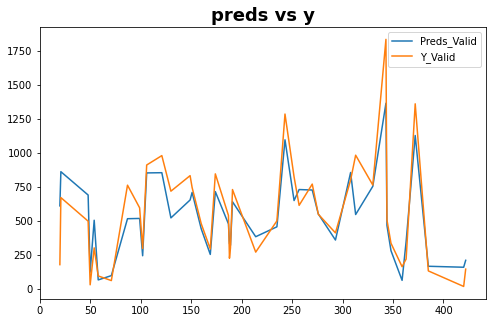

In [93]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(pd.Series(preds_valid, index=Y_valid.index), label='Preds_Valid')
ax.plot(Y_valid, label='Y_Valid')
ax.legend()
ax.set_title('preds vs y', fontsize=18, fontweight='bold')

# Cross validate 모델 사용

In [65]:
from sklearn.metrics import make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

scorer = make_scorer(mean_absolute_error, greater_is_better=False)

In [94]:
# ElasticNet
cross_val = cross_validate(model_Ela, x_train, y_train, scoring=scorer, cv=30, n_jobs=-1, return_estimator=True)
cross_val['test_score'].mean()

-129.39102357555925

In [67]:
# Ridge
cross_val = cross_validate(Ridge(alpha=0.5, max_iter=1000, random_state=42, normalize=True), x_train, y_train, scoring=scorer, cv=30, n_jobs=-1, return_estimator=True)
cross_val['test_score'].mean()

-131.28514742140587

In [95]:
# Lasso
cross_val = cross_validate(Lasso(alpha=0.5, random_state=42, normalize=True), x_train, y_train, scoring=scorer, cv=30, n_jobs=-1)
cross_val['test_score'].mean()

-125.79551501920463

In [ ]:
# linear
cross_val = cross_validate(LinearRegression(n_jobs=-1), x_train, y_train, scoring=scorer, cv=30, n_jobs=-1, return_estimator=True)
cross_val['test_score'].mean()

-139.86700358811157

In [ ]:
# Decision
cross_val = cross_validate(DecisionTreeRegressor(criterion='mae', random_state=42), x_train, y_train, scoring=scorer, cv=30, n_jobs=-1, return_estimator=True)
cross_val['test_score'].mean()

-193.1904761904762

In [ ]:
# Extra
cross_val = cross_validate(ExtraTreeRegressor(criterion='mae', random_state=42), x_train, y_train, scoring=scorer, cv=30, n_jobs=-1, return_estimator=True)
cross_val['test_score'].mean()

-195.00920634920632

In [ ]:
# XGBoost
cross_val = cross_validate(model_xgb, x_train, y_train, scoring=scorer, cv=30, n_jobs=-1, return_estimator=True)
cross_val['test_score'].mean()

KeyboardInterrupt: ignored

In [96]:
# lgbm 모델
from sklearn.model_selection import RepeatedKFold

cross_val = cross_validate(model_lgbm, x_train, y_train, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1)
cross_val['test_score'].mean()

-124.16865874115308

In [ ]:
# catboost 모델
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
cross_val = cross_validate(catboost.CatBoostRegressor(learning_rate=0.022, n_estimators=3000), x_train, y_train, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1, return_estimator=True)
cross_val['test_score'].mean()

-125.40717491264002

In [ ]:
from sklearn.ensemble import RandomForestRegressor
cross_val = cross_validate(RandomForestRegressor(criterion='mae', random_state=42), x_train, y_train, scoring='neg_mean_absolute_error', cv=20, n_jobs=-1, return_estimator=True)
cross_val['test_score'].mean()

-124.33249296536796

# 지역별 나이까지 추가해야 mae가 확 줄음 지역과 나이 피쳐 엔지니어링도 괜찮을듯

# 뭐야 제출하니까 점수가 안나오잖아 다시 생각해봐야 한다 지역별 나이

# 최고점은 info 안하고 lgbm으로 돌렸을때

# 라쏘로도 돌려보자

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# feature selection
x_train_sel = SelectKBest(f_classif).fit_transform(x_train, y_train)

In [ ]:
x_train.shape

(423, 31)

In [ ]:
x_train_sel.shape

(423, 10)

In [ ]:
cross_val_preds = cross_val_predict(model_lgbm, x_train, y_train, cv=30, n_jobs=-1)

In [ ]:
cross_val_preds

Text(0.5, 1.0, 'preds vs y')

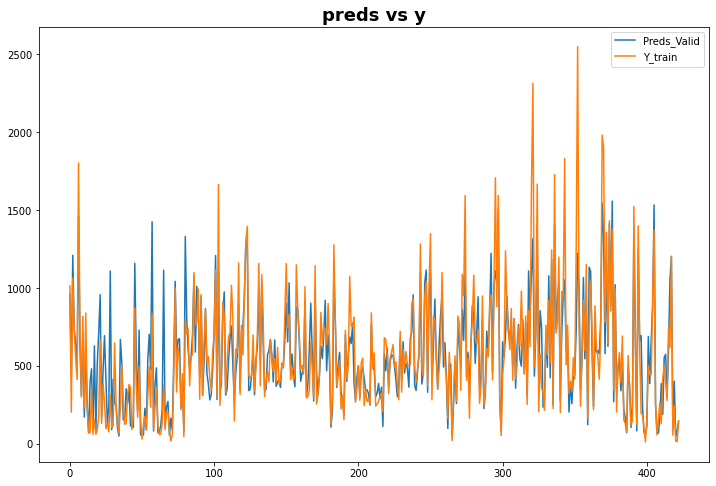

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(pd.Series(cross_val_preds, index=y_train.index), label='Preds_Valid')
ax.plot(y_train, label='Y_train')
ax.legend()
ax.set_title('preds vs y', fontsize=18, fontweight='bold')

In [ ]:
# ElastickNet 모델 사용
cross_val_preds = cross_val_predict(model_Ela, x_train, y_train, cv=30, n_jobs=-1)

Text(0.5, 1.0, 'preds vs y')

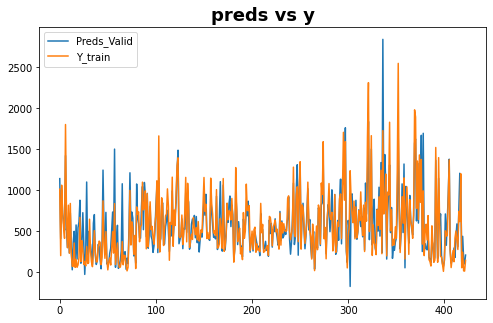

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(pd.Series(cross_val_preds, index=y_train.index), label='Preds_Valid')
ax.plot(y_train, label='Y_train')
ax.legend()
ax.set_title('preds vs y', fontsize=18, fontweight='bold')

In [ ]:
# model selection RFE(후진제거법)
from sklearn.feature_selection import RFE

model = model_lgbm
rfe = RFE(model)
fit = rfe.fit(x_train, y_train)

In [ ]:
feature_selected = pd.Series(fit.support_, index=x_train.columns)
feature_selected_columns = list(feature_selected.loc[feature_selected == True].index)
feature_selected

총세대수                             True
공가수                              True
지역                               True
단지내주차면수                          True
도보 10분거리 내 지하철역 수(환승노선 수 반영)    False
도보 10분거리 내 버스정류장 수               True
면적_35.0                          True
면적_50.0                          True
면적_55.0                          True
면적_30.0                          True
면적_45.0                          True
면적_40.0                         False
면적_25.0                          True
면적_70.0                         False
면적_15.0                         False
면적_20.0                         False
면적_100.0                        False
면적_60.0                         False
면적_75.0                         False
면적_80.0                         False
면적_65.0                         False
실거주세대                            True
공실율                              True
세대당주차면수                          True
단지내주차면수_bin_a                   False
단지내주차면수_bin_b                   False
단지내주차면수_bin_

In [ ]:
pd.Series(fit.ranking_, index=x_train.columns).sort_values(ascending=True)

총세대수                             1
공가수                              1
지역                               1
단지내주차면수                          1
도보 10분거리 내 버스정류장 수               1
면적_35.0                          1
면적_50.0                          1
면적_55.0                          1
면적_30.0                          1
면적_45.0                          1
세대당주차면수                          1
면적_25.0                          1
공실율                              1
실거주세대                            1
면적_20.0                          2
도보 10분거리 내 지하철역 수(환승노선 수 반영)     3
면적_15.0                          4
단지내주차면수_bin_d                    5
단지내주차면수_bin_b                    6
면적_40.0                          7
단지내주차면수_bin_c                    8
면적_80.0                          9
면적_70.0                         10
면적_100.0                        11
단지내주차면수_bin_a                   12
면적_60.0                         13
면적_75.0                         14
면적_65.0                         15
단지내주차면수_bin_e       

In [ ]:
x_train_sel = x_train[feature_selected_columns]
x_test_sel = x_test[feature_selected_columns]

In [97]:
submit['num'] = preds_test_lgbm
submit.to_csv('/content/drive/MyDrive/dataset/Dacon/대회/235745_parking_data/submit_18.csv', index=False)
submit

,code,num
0,C1072,723.980655
1,C1128,1294.683994
2,C1456,530.632649
3,C1840,448.282078
4,C1332,1186.920908
...,...,...
145,C2456,254.051363
146,C1266,458.267134
147,C2152,43.856244
148,C1267,447.886569


# 모델은 lgbm이 점수가 잘나오고 그 다음이 라쏘(엘라스틱 넷도 제출 해보자) aggregation을 잘해서(합계 말고, 불린으로 해보자) 제출

In [ ]:
submit['num'] = preds_test_cat
submit

,code,num
0,C1072,763.190180
1,C1128,1261.937146
2,C1456,588.037042
3,C1840,548.213311
4,C1332,1225.286551
...,...,...
145,C2456,220.508849
146,C1266,515.472701
147,C2152,91.418749
148,C1267,483.216688
